## Decision tree

-> see LAB 7.1

In [233]:
import pandas as pd

In [234]:
df= pd.read_csv("/Users/tanjamarkotic/Desktop/DMML2019_Team_Swatch/data/DataWithLocationCleaned.csv.gz")

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [236]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [237]:
# checking types
df.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
dtype: object

In [238]:
# correct types and add columns longitude/latitude cleaned
df['Date'] = pd.to_datetime(df['Date'])
df['position']=df['position'].str.replace(" ", "").str.strip('(').str.strip(')')
df['latitude']=df['position'].str.split(',').str[0].str.split('.').str[0]
df['longitude']=df['position'].str.split(',').str[1].str.split('.').str[0]
df['latitude'] = df['latitude'].replace(['InternationalFalls'], 48)
df['latitude'] = df['latitude'].replace(['PleasantCamp'], 59)
df['latitude'] = df['latitude'].replace("\'48", '48')
df['latitude'] = df['latitude'].replace("\'44", '44')
df['longitude'] = df['longitude'].replace('KoochichingCounty', '-93')
df['longitude'] = df['longitude'].replace('Skagway', '-136')
df['longitude'] = df['longitude'].replace('\'-116', '-116')
df['longitude'] = df['longitude'].replace('\'-66', '-66')
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df.dtypes


Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                 int64
position             object
latitude              int64
longitude             int64
dtype: object

In [239]:
df = df[df['Measure'].isin(['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers'])]
df = df.reset_index(drop=True)
df.shape


(116131, 12)

In [240]:
df.groupby(['Port Name']).sum().sort_values(['Value'],
                                            ascending=False).head()



,Port Code,Value,Year,Month,latitude,longitude
Port Name,,,,,,
San Ysidro,2736872,820753587,2193570,7033,34976,-127881
El Paso,2709456,813405376,2264184,7260,34968,-119568
Laredo,2518272,435119695,2193570,7033,29511,-108207
Hidalgo,2519365,406092835,2193570,7033,28418,-107114
Calexico,2648174,401463611,2122956,6806,33856,-121670


In [241]:
df.shape

(116131, 12)

In [242]:
 df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Year         0
Month        0
position     0
latitude     0
longitude    0
dtype: int64

In [243]:
# check values...
df['Value'].describe()

count    1.161310e+05
mean     5.778344e+04
std      2.366958e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.560000e+02
75%      6.943000e+03
max      4.447374e+06
Name: Value, dtype: float64

In [244]:
df['Value category'], bins = pd.cut(df.Value, retbins = True, right=False, labels = False, bins = 8)

In [245]:
bins

array([      0.   ,  555921.75 , 1111843.5  , 1667765.25 , 2223687.   ,
       2779608.75 , 3335530.5  , 3891452.25 , 4451821.374])

In [246]:
# check categories...
df.sort_values(['Value'],ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,latitude,longitude,Value category
90369,El Paso,Texas,2402,US-Mexico Border,2001-03-01,Personal Vehicle Passengers,4447374,2001,3,"31.7600372,-106.487287",31,-106,7
93325,El Paso,Texas,2402,US-Mexico Border,2000-08-01,Personal Vehicle Passengers,4291774,2000,8,"31.7600372,-106.487287",31,-106,7
90890,El Paso,Texas,2402,US-Mexico Border,2001-02-01,Personal Vehicle Passengers,4281175,2001,2,"31.7600372,-106.487287",31,-106,7
90034,El Paso,Texas,2402,US-Mexico Border,2001-04-01,Personal Vehicle Passengers,4252128,2001,4,"31.7600372,-106.487287",31,-106,7
93966,El Paso,Texas,2402,US-Mexico Border,2000-06-01,Personal Vehicle Passengers,4235244,2000,6,"31.7600372,-106.487287",31,-106,7


In [247]:
df['Value category'].value_counts()

0    112377
1      2512
2       635
3       346
4       127
5        69
6        45
7        20
Name: Value category, dtype: int64

In [252]:
ports = df['Port Name'].unique()
goods = []
for port in ports:
    if (df[(df['Port Name'] == port) &(df['Value'] != 0)].shape[0]>1100):
        goods.append(port)
print("number of ports : ",len(goods))
print("port names: ", goods)
print("number of observations  ",df[df['Port Name'].isin(goods)].shape[0])


number of ports :  9
port names:  ['Sumas', 'Champlain-Rouses Point', 'Buffalo-Niagara Falls', 'Portal', 'International Falls-Ranier', 'Otay Mesa', 'Eastport_ID', 'Jackman', 'Sweetgrass']
number of observations   10147


In [253]:

df = df[df['Port Name'].isin(goods)].reset_index(drop=True)
#df[df['Port Name'].isin(goods)]['Value'].hist(range=[0,500])
df.shape

(10147, 13)

In [254]:
df['Value category'].value_counts()

0    9592
1     418
2     109
3      24
4       4
Name: Value category, dtype: int64

In [165]:
#df['Value in millions'] = (df['Value']/1000000).apply(lambda x: '{:,.2f}'.format(x))

In [255]:
#features but possibly add lat, long, measure
X = df[["Year","Month", "Port Code"]]
y = df["Value category"]
X.shape

(10147, 3)

In [256]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
dtype: int64

In [257]:
X.head()

,Year,Month,Port Code
0,2019,6,3009
1,2019,6,3009
2,2019,6,3009
3,2019,6,3009
4,2019,6,712


In [259]:
y = y.astype('int')
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Value category, dtype: int64

In [260]:
# one-hot encoding for Border
one_hot = OneHotEncoder(categories="auto")
cat_to_onehot = one_hot.fit_transform(df[["Border"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)
cat_to_onehot.shape

(10147, 2)

In [261]:
X = pd.concat((X, cat_to_onehot), axis=1, join='inner').reindex(df.index)

X.shape

(10147, 5)

In [262]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
0            0
1            0
dtype: int64

In [263]:
X= X.astype('int')


In [264]:
X.head()

,Year,Month,Port Code,0,1
0,2019,6,3009,1,0
1,2019,6,3009,1,0
2,2019,6,3009,1,0
3,2019,6,3009,1,0
4,2019,6,712,1,0


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [266]:
clf = DecisionTreeClassifier(criterion='entropy')

In [267]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [268]:
# test accuracy
clf.score(X_test,y_test)

0.9315270935960591

In [269]:
# depth of the decision tree
clf.get_depth()

16

Tuning depth of the tree:

In [270]:
scores = []
for d in range(1, 21):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

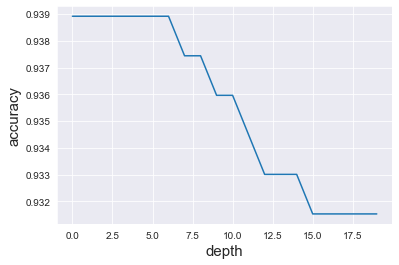

In [271]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [272]:
# best depth
np.argmax(scores)

0

Feature importance

In [273]:
# feature importances for best classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.04629746, 0.        , 0.95370254, 0.        , 0.        ])

In [274]:
sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

[('Port Code', 0.9537025440169418),
 ('Year', 0.04629745598305822),
 ('Month', 0.0),
 (0, 0.0),
 (1, 0.0)]

Visualizing the decision tree

In [275]:
!pip install pydotplus
!pip install graphviz

     |████████████████████████████████| 286kB 2.7MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24568 sha256=546e23e0df5170d04e9f5d52e983d97e46d7ea759222346613e371dc6540699a
  Stored in directory: /Users/tanjamarkotic/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [277]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH